## 1 - Visualization

         day  ENTRIESn_hourly
0     Sunday       24130096.0
1     Monday       22997954.0
2    Tuesday       23562636.0
3  Wednesday       23486649.0
4   Thursday       23130773.0
5     Friday       14044105.0
6   Saturday       13180114.0


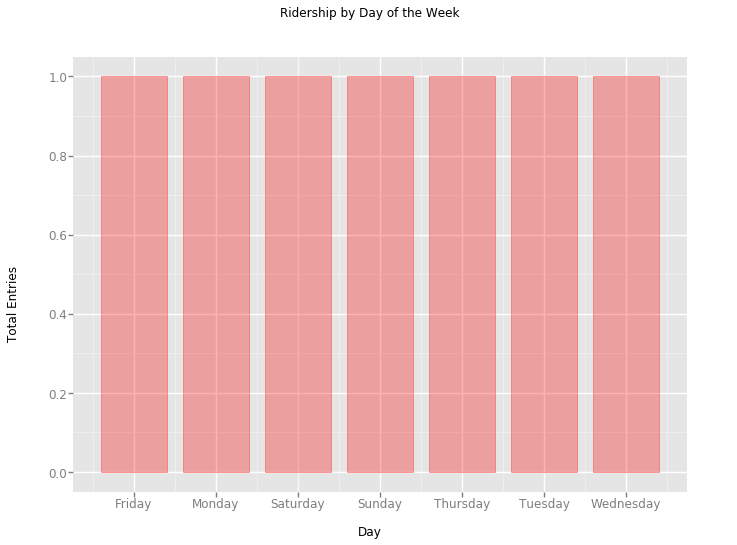

<ggplot: (293634449)>


In [95]:
import pandas as pd
from ggplot import *
import datetime

turnstile_weather = pd.read_csv('turnstile_data_master_with_weather.csv')


def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''
    
    # plot Readership by days of the week
    day_of_week = lambda x: datetime.datetime.strptime(x, '%Y-%M-%d').strftime('%w')
    turnstile_weather['day'] = turnstile_weather['DATEn'].apply(day_of_week)
    turnstile_week = turnstile_weather[['day','ENTRIESn_hourly']].groupby('day', as_index=False).sum()
    turnstile_week['day'] = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
    print turnstile_week
    
    plotWeekDays = ggplot(turnstile_week, aes(x='day', y='ENTRIESn_hourly')) \
        + geom_bar( color='red', fill='red', alpha=0.3) \
        + xlab('Day') + ylab('Total Entries') + ggtitle('Ridership by Day of the Week') 
    print(plotWeekDays)

    return None

plot_weather_data(turnstile_weather)

## 2 - Make Another Visualization

    Hour  ENTRIESn_hourly
0      0       10808140.0
1      1        4968660.0
2      2         428132.0
3      3          81347.0
4      4        2438467.0
5      5        1179772.0
6      6         182794.0
7      7         383688.0
8      8        5494724.0
9      9       11040951.0
10    10        1315487.0
11    11         646283.0
12    12       22813370.0
13    13        9410492.0
14    14        1164714.0
15    15         447312.0
16    16       17336942.0
17    17       12692994.0
18    18        1688747.0
19    19         834832.0
20    20       24505496.0
21    21       13121000.0
22    22        1202310.0
23    23         345673.0


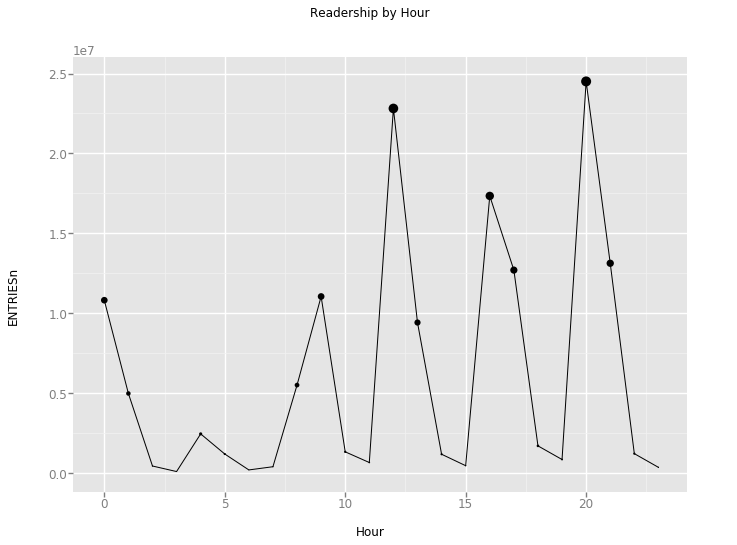

<ggplot: (291337061)>


In [83]:
import pandas as pd
from ggplot import *
import datetime

turnstile_weather = pd.read_csv('turnstile_data_master_with_weather.csv')


def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''
    # plot Readership by hours of the day
    turnstile_hour = turnstile_weather[['Hour','ENTRIESn_hourly']].groupby('Hour', as_index=False).sum()
    print turnstile_hour
    
    plotHour = ggplot(aes(x= 'Hour', y='ENTRIESn_hourly'), data=turnstile_hour) \
        + geom_line() \
        + geom_point(size=100*turnstile_hour['ENTRIESn_hourly'].abs()/turnstile_hour['ENTRIESn_hourly'].abs().max()) \
        + ggtitle('Readership by Hour') + xlab('Hour') + ylab('ENTRIESn') 
    print(plotHour)
    
    return None

plotHour = plot_weather_data(turnstile_weather)